In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r'C:\Users\Ni Wayan Devina\ML\Vaccine\Data\dataset.xlsx')
array = [0, 1]
data = data.replace({'NO':0, 'YES':1,
                     'DIBERIKAN VAKSIN':1,
                     'DITUNDA':2,'TIDAK DIBERIKAN VAKSIN':3}) 
data

,Name,Gender,Age,Temperature,Date,Dose,Vaccine_Type,Contact,Confirmed,Symptomps,Allergy,Serious_Illness,Asm_Ep_Dia,Pregnant,Elderly_Physical,Elderly_Disease,Result
0,AYU,P,22,36.5,2021-08-30,1,AZD1222 (AstraZeneca),0,0,0,0,0,0,0,0,0,1
1,AIDA,P,60,37.0,2021-08-30,1,CoronaVac,0,0,0,0,0,0,0,0,0,1
2,AMANDA,P,43,35.8,2021-08-30,1,CoronaVac,0,0,0,0,0,0,0,0,0,1
3,ASTRID,P,34,36.0,2021-08-30,3,Moderna,0,0,0,0,0,0,0,0,0,1
4,ABRAHAM,L,45,36.8,2021-08-30,1,Moderna,0,1,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,KINGSTON,L,31,37.1,2021-08-30,2,CoronaVac,0,0,0,0,0,0,0,0,0,1
1996,KAYLA,P,48,36.0,2021-08-30,2,AZD1222 (AstraZeneca),0,0,0,0,0,0,0,0,0,1
1997,KIANO,L,54,36.0,2021-08-30,2,CoronaVac,0,0,0,0,0,0,0,0,0,1
1998,KRESNA,L,20,36.8,2021-08-30,2,CoronaVac,0,0,0,0,0,0,0,0,0,1


In [3]:
data.groupby('Result').size()

Result
1    1933
2      56
3      11
dtype: int64

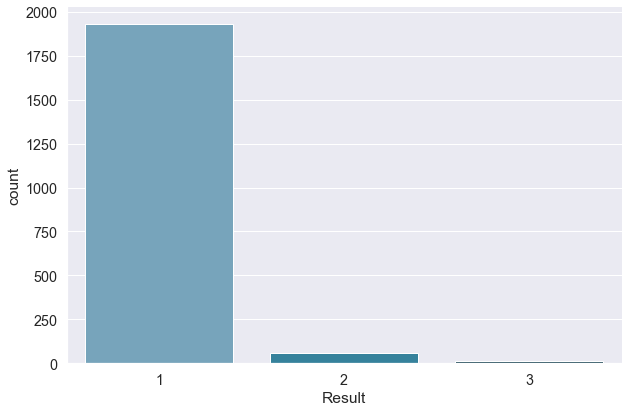

In [4]:
sns.factorplot(x="Result", data=data, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [5]:
X = data.iloc[:,7:16]
y = data.Result

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test))

(1600, 9) (1600,) (400, 9) (400,)


In [7]:
# define k = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the KNN model is', accuracy)

Accuracy of the KNN model is 0.9925


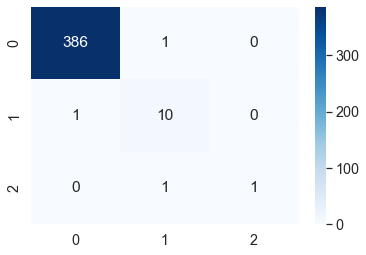

In [8]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt=".3g",cmap="Blues")
plt.show()

In [9]:
# saving the model for the app
pickle.dump(knn, open('Model/knn_model.sav', 'wb'))